# 泰坦尼克号幸存者预测

# 1 读取和分析数据

In [1]:
import pandas as pd

In [2]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv
data = pd.read_csv(r"data.csv",index_col='PassengerId') # 读取数据，把PassengerId作为DataFrame索引 Read a comma-separated values (csv) file into DataFrame.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head
data.head() # Return the first n rows.(nint, default 5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html?highlight=data%20info#pandas.DataFrame.info
data.info() # This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


# 2 数据预处理

In [4]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# 删除和预测的y没有关系的列（Name、Ticket）、缺失值过多的列（Cabin）
data.drop(columns=['Name','Ticket','Cabin'],inplace=True,axis=1) # Drop specified labels from rows or columns.
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [5]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html?highlight=mean#pandas.DataFrame.mean
print("年龄平均值:",data['Age'].mean()) # 年龄平均值
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html?highlight=fillna#pandas.Series.fillna
data['Age'] = data['Age'].fillna(data['Age'].mean()) # 平均值填补缺失值数量少的列
data.info()

年龄平均值: 29.69911764705882
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [6]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html?highlight=dropna#pandas.Series.dropna
data = data.dropna() # 丢弃缺失值的少数行
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [7]:
#把两极值的性别转换为整数（0、1表示）
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html?highlight=astype#pandas.Series.astype
print("(data['Sex'] == 'female').dtypes类型：",(data['Sex'] == 'female').dtypes) # bool类型可以直接与数值型转换
data['Sex'] = (data['Sex'] == 'female').astype("int") # Cast a pandas object to a specified dtype dtype.
data['Age'] = data['Age'].astype("int") # 整数型年龄
data

(data['Sex'] == 'female').dtypes类型： bool


e:\working\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
e:\working\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22,1,0,7.2500,S
2,1,1,1,38,1,0,71.2833,C
3,1,3,1,26,0,0,7.9250,S
4,1,1,1,35,1,0,53.1000,S
5,0,3,0,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,0,27,0,0,13.0000,S
888,1,1,1,19,0,0,30.0000,S
889,0,3,1,29,1,2,23.4500,S


In [11]:
#将分类变量转换为数值型变量
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html?highlight=unique#pandas.Series.unique
print("data[\"Embarked\"].unique()类型：",type(data["Embarked"].unique())) # Return unique values of Series object as a NumPy array. See Notes.
#https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.tolist.html?highlight=tolist#numpy.ndarray.tolist
labels = data["Embarked"].unique().tolist() # Return a copy of the array data as a (nested) Python list. 
print("labels值：",labels)
#https://realpython.com/python-lambda/#lambda-calculus
print("lambda函数调用：",lambda x: labels.index(x))
print("lambda函数：",type(lambda x: labels.index(x)))
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x)) # Invoke function on values of Series.
data.head()

data["Embarked"].unique()类型： <class 'numpy.ndarray'>
labels值： ['S', 'C', 'Q']
lambda函数调用： <function <lambda> at 0x0C51C978>
lambda函数： <class 'function'>


e:\working\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22,1,0,7.2500,0
2,1,1,1,38,1,0,71.2833,1
3,1,3,1,26,0,0,7.9250,0
4,1,1,1,35,1,0,53.1000,0
5,0,3,0,35,0,0,8.0500,0


In [12]:
#分开自变量X和因变量Y
#方法一：判断得结果bool值list提取
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html?highlight=columns#pandas.DataFrame.columns
print("data.columns值：",data.columns) # The column labels of the DataFrame.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html?highlight=iloc#pandas.DataFrame.iloc
X = data.iloc[:,data.columns != 'Survived'] # Purely integer-location based indexing for selection by position.
Y = data.iloc[:,data.columns == 'Survived']
print(Y)

data.columns值： Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
             Survived
PassengerId          
1                   0
2                   1
3                   1
4                   1
5                   0
...               ...
887                 0
888                 1
889                 0
890                 1
891                 0

[889 rows x 1 columns]


In [13]:
#方法二：使用bool值list提取
print("[False,  True,  True,  True,  True,  True,  True,  True]的类型",type([False,  True,  True,  True,  True,  True,  True,  True]))
X = data.iloc[:,[False,  True,  True,  True,  True,  True,  True,  True]]
print("X的类型",type(X))
Y = data.iloc[:,[ True, False, False, False, False, False, False, False]]
print(Y)

[False,  True,  True,  True,  True,  True,  True,  True]的类型 <class 'list'>
X的类型 <class 'pandas.core.frame.DataFrame'>
             Survived
PassengerId          
1                   0
2                   1
3                   1
4                   1
5                   0
...               ...
887                 0
888                 1
889                 0
890                 1
891                 0

[889 rows x 1 columns]


In [14]:
#方法三:序号提取
X = data.iloc[:,[1,2,3,4,5,6,7]]
X = pd.DataFrame(X)
Y = data.iloc[:,0]
print("iloc[:,0]的类型：",type(Y))
Y = pd.DataFrame(Y)
print("DataFrame(Y)的类型：",type(Y))
print(Y)

iloc[:,0]的类型： <class 'pandas.core.series.Series'>
DataFrame(Y)的类型： <class 'pandas.core.frame.DataFrame'>
             Survived
PassengerId          
1                   0
2                   1
3                   1
4                   1
5                   0
...               ...
887                 0
888                 1
889                 0
890                 1
891                 0

[889 rows x 1 columns]


In [15]:
#分割训练集和测试集
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3) #测试集占30%
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
568,3,1,29,0,4,21.0750,0
246,1,0,44,2,0,90.0000,2
249,1,0,37,1,1,52.5542,0
218,2,0,42,1,0,27.0000,0
675,2,0,29,0,0,0.0000,0
...,...,...,...,...,...,...,...
409,3,0,21,0,0,7.7750,0
68,3,0,19,0,0,8.1583,0
691,1,0,31,1,0,57.0000,0


In [16]:
#修正测试集和训练集的索引
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape
print("Xtrain.shape的值：",Xtrain.shape,"\nXtrain.shape的类型：",type(Xtrain.shape)) # Return a tuple representing the dimensionality of the DataFrame.
#https://www.geeksforgeeks.org/python-range-function/
print("range(Xtrain.shape[0])的值：",range(Xtrain.shape[0]))
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    pass
Xtrain

Xtrain.shape的值： (622, 7) 
Xtrain.shape的类型： <class 'tuple'>
range(Xtrain.shape[0])的值： range(0, 622)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,29,0,4,21.0750,0
1,1,0,44,2,0,90.0000,2
2,1,0,37,1,1,52.5542,0
3,2,0,42,1,0,27.0000,0
4,2,0,29,0,0,0.0000,0
...,...,...,...,...,...,...,...
617,3,0,21,0,0,7.7750,0
618,3,0,19,0,0,8.1583,0
619,1,0,31,1,0,57.0000,0
620,2,1,17,0,0,10.5000,0


# 3 跑模型

In [17]:
#决策树建模
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=95) #  To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 
clf = clf.fit(Xtrain, Ytrain) # Build a decision tree classifier from the training set (X, y).
score_ = clf.score(Xtest, Ytest) # Return the mean accuracy on the given test data and labels.
score_

0.7940074906367042

In [18]:
#决策树模型交叉验证
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X,Y,cv=10) # Evaluate a score by cross-validation
print("scores的10个评估值：",scores)
#https://www.geeksforgeeks.org/python-statistics-mean-function/
score = scores.mean()  # 平均评估值
print("决策树模型交叉验证的平均评估值：",score)

scores的10个评估值： [0.73033708 0.7752809  0.73033708 0.7752809  0.84269663 0.74157303
 0.80898876 0.78651685 0.86516854 0.77272727]
决策树模型交叉验证的平均评估值： 0.7828907048008171


In [19]:
#模型在不同max_depth下的拟合状况
tr = [] # 存储训练集的评估值
te = [] # 存储测试集的评估值
for i in range(10): # 1~10深度的评估情况
    clf = DecisionTreeClassifier(random_state=95
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_train = clf.score(Xtrain,Ytrain)
    score_test = cross_val_score(clf,X,Y,cv=10).mean()
    tr.append(score_train)
    te.append(score_test)
print("训练集评估值：",tr)
print("训练集最大评估值：",max(tr))
print("测试集评估值：",te)
print("测试集最大评估值：",max(te))

训练集评估值： [0.7942122186495176, 0.7942122186495176, 0.8167202572347267, 0.8311897106109325, 0.8408360128617364, 0.8520900321543409, 0.8713826366559485, 0.882636655948553, 0.9003215434083601, 0.9212218649517685]
训练集最大评估值： 0.9212218649517685
测试集评估值： [0.7862487231869254, 0.7682711950970378, 0.8166624106230849, 0.7998340143003065, 0.8099463738508682, 0.8155388151174667, 0.8166624106230846, 0.8099208375893768, 0.8065628192032687, 0.8043156281920327]
测试集最大评估值： 0.8166624106230849


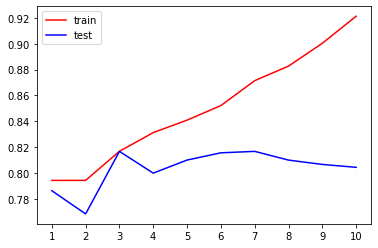

In [20]:
#折线性图显示训练集合测试集的拟合情况
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html?highlight=plot#module-matplotlib.pyplot
import matplotlib.pyplot as plt
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
#https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(range(1,11))
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend
plt.legend() # Place a legend on the axes.
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show
plt.show() # Display all figures.

In [21]:
#用网格搜索调整参数
import numpy as np
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV
from sklearn.model_selection import GridSearchCV
#https://numpy.org/doc/1.18/reference/generated/numpy.linspace.html
gini_thresholds = np.linspace(0,0.5,10) # 在0~0.5之间获取20个有序递增的数字
print("gini_thresholds的值：",gini_thresholds)
parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*gini_thresholds]
             }
#https://www.pythoncentral.io/pythons-range-function-explained/
print("range(1,10)的类型：",type(range(1,10)),"\n[*range(1,10)]的类型：",type([*range(1,10)]))
clf = DecisionTreeClassifier(random_state=95)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)
print("最佳评估分的参数组合：",GS.best_params_) # Parameter setting that gave the best results on the hold out data.
print("最佳评估分：",GS.best_score_) # Mean cross-validated score of the best_estimator

gini_thresholds的值： [0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5       ]
range(1,10)的类型： <class 'range'> 
[*range(1,10)]的类型： <class 'list'>
最佳评估分的参数组合： {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 21, 'splitter': 'random'}
最佳评估分： 0.8215565796210956


# 4 画出最佳决策树

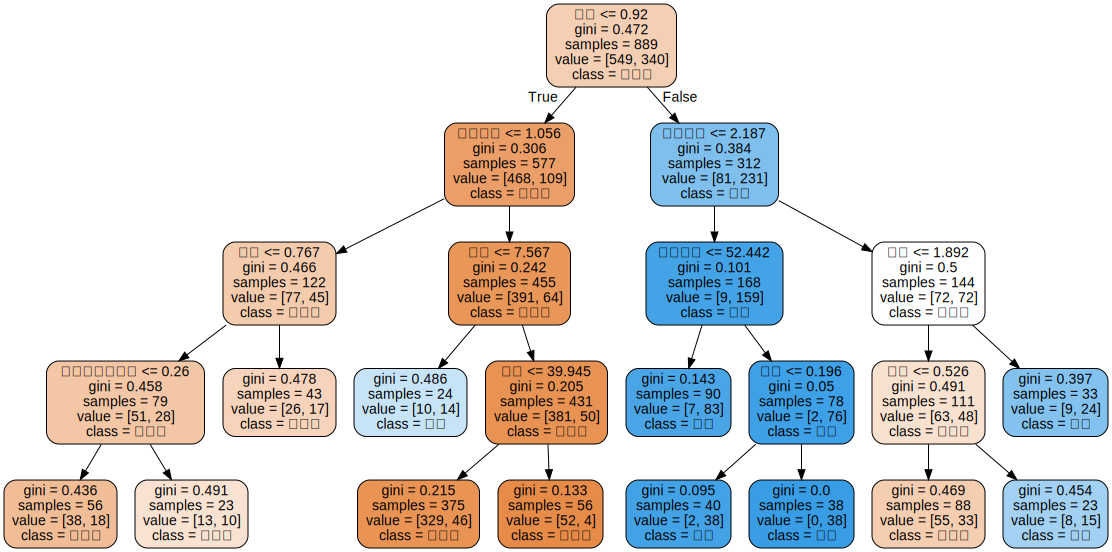

In [23]:
#画出决策树
import graphviz
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(random_state=95,min_samples_leaf= 21,splitter= 'random',max_depth= 4)
clf = clf.fit(X,Y)
feature_name = ['船舱等级','性别','年龄','兄弟姐妹的个数','老人与孩子的个数','船票价格','码头']
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html?highlight=export_graphviz#sklearn.tree.export_graphviz
dot_data = export_graphviz(clf # Export a decision tree in DOT format.
                                ,out_file = None
                                ,feature_names= feature_name  
                                ,class_names=["未获救","获救"]
                                ,filled=True
                                ,rounded=True
                                )
#https://graphviz.readthedocs.io/en/stable/api.html#graphviz.Source
graph = graphviz.Source(dot_data) # Verbatim DOT source code string to be rendered by Graphviz.
graph

# 5 测试集检测分类树模型

In [24]:
#测试集检测分类树模型
#读取和查看测试集
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [26]:
# 测试集预处理（与训练集预处理一样）
test = test.drop(columns=['PassengerId','Name','Ticket','Cabin']) # 删除低价值的列
test['Age'] = test['Age'].fillna(test['Age'].mean()) # 填补缺失值占比不小的列
test['Fare'] = test['Fare'].fillna(test['Fare'].mean()) # 填补缺失值数量少的列或者删除少数列
test['Age'] = test['Age'].astype("int")
test['Sex'] = (test['Sex'] == 'female').astype('int') # 用0、1数字表示性别两极值
test['Embarked'] = test['Embarked'].apply(lambda x:[*test['Embarked'].unique()].index(x)) # 将分类变量转换为数值型变量
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7.8292,0
1,3,1,47,1,0,7.0000,1
2,2,0,62,0,0,9.6875,0
3,3,0,27,0,0,8.6625,1
4,3,1,22,1,1,12.2875,1


In [27]:
#模型对测试集的预测结果
test['Survived'] = pd.DataFrame(clf.predict(test)) # Predict class or regression value for X.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts
survive = test['Survived'].value_counts(normalize=True) # Return a Series containing counts of unique values.
print('死亡人数占{:.2%}; 幸存人数占{:.2%}'.format(survive[0],survive[1]))

死亡人数占67.22%; 幸存人数占32.78%


test_counts的值：
 0    281
1    137
Name: Survived, dtype: int64


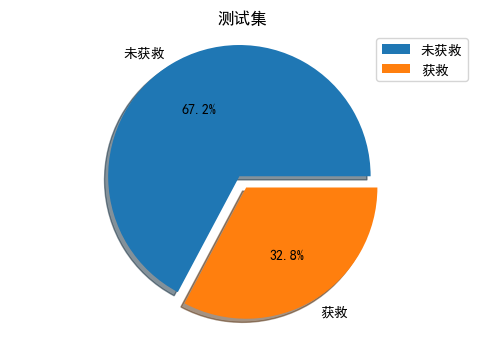

In [28]:
#饼图显示测试集预测结果
test_counts = test['Survived'].value_counts()
print("test_counts的值：\n",test_counts)
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
plt.figure(figsize=(6,4),dpi=100) # Create a new figure.
plt.rcParams['font.sans-serif']=['SimHei'] # display chinese label
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie
plt.pie(test_counts
        ,explode=(0, 0.1) # a len(x) array which specifies the fraction of the radius with which to offset each wedge.
        ,labels=['未获救','获救'] # A sequence of strings providing the labels for each wedge
        ,shadow=True # Draw a shadow beneath the pie.
        , autopct='%1.1f%%' # The label will be placed inside the wedge.
       )     
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.axis.html#matplotlib.pyplot.axis
plt.axis('equal') # Set equal scaling (i.e., make circles circular) by changing axis limits.    
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title
plt.title('测试集') # Set a title for the axes.
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend
plt.legend() # Place a legend on the axes.

# 6 饼图展示训练集和测试集的对比	

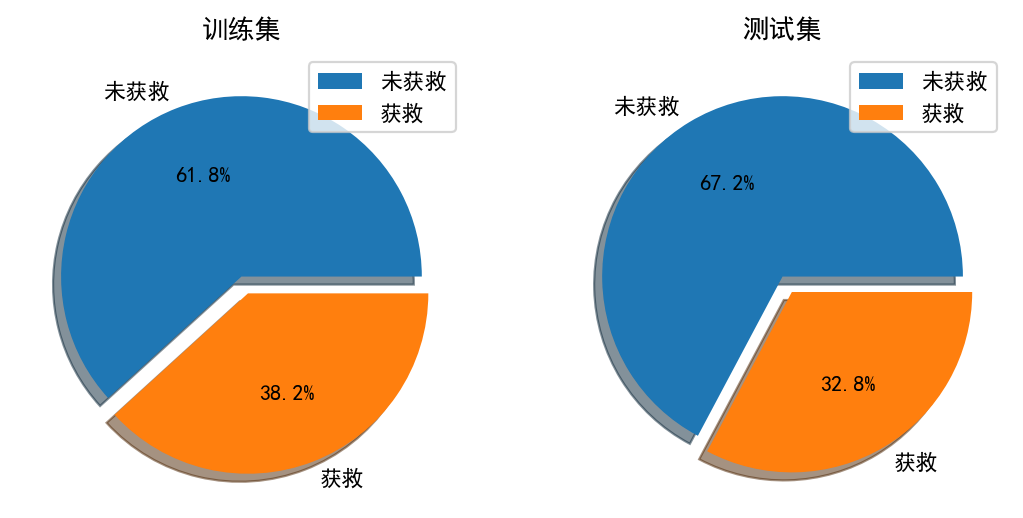

In [29]:
#饼图展示训练集和测试集的对比
plt.figure(figsize=(8,6),dpi=160)
train_count = Y['Survived'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei']
#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
plt.subplot(1,2,1) # Add a subplot to the current figure.
plt.pie(train_count, explode=(0, 0.1),labels=['未获救','获救'],
         shadow=True, autopct='%1.1f%%')     
plt.title('训练集')
plt.legend()
test_counts = test['Survived'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei']
plt.subplot(1,2,2)
plt.pie(test_counts, explode=(0, 0.1),labels=['未获救','获救'],
         shadow=True, autopct='%1.1f%%',)     
plt.title('测试集')
plt.legend()